In [9]:
# Import libraries
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [10]:
# Train datasets
original_train = pd.read_csv('../datasets/covertype_train.csv')
original_norm_train = pd.read_csv('../datasets/covertype_norm_train.csv')
lda_train = pd.read_csv('../datasets/covertype_lda_train_raw.csv')
lda_norm_train = pd.read_csv('../datasets/covertype_lda_train.csv')

# Targets
target_original_train = original_train.iloc[:,-1]
target_original_norm_train = original_norm_train.iloc[:,-1]
target_lda_train = lda_train.iloc[:,-1]
target_lda_norm_train = lda_norm_train.iloc[:,-1]

# Dataset without classes
data_original_train = original_train.iloc[:,:-1]
data_original_norm_train = original_norm_train.iloc[:,:-1]
data_lda_train = lda_train.iloc[:,:-1]
data_lda_norm_train = lda_norm_train.iloc[:,:-1]

In [11]:
# Test datasets
original_test = pd.read_csv('../datasets/covertype_test.csv')
original_norm_test = pd.read_csv('../datasets/covertype_norm_test.csv')
lda_test = pd.read_csv('../datasets/covertype_lda_test_raw.csv')

# Targets
target_original_test = original_test.iloc[:,-1]
target_original_norm_test = original_norm_test.iloc[:,-1]
target_lda_test = lda_test.iloc[:,-1]

# Dataset without classes
data_original_test = original_test.iloc[:,:-1]
data_original_norm_test = original_norm_test.iloc[:,:-1]
data_lda_test = lda_test.iloc[:,:-1]

In [21]:
def perform_mlp(train, test, title):
    '''
    Performs mlp for a given dataset.
    '''
    
    train_target = train['cover_type']
    train_data   = train.loc[:, train.columns != 'cover_type']
    test_target  = test['cover_type']
    test_data    = test.loc[:, test.columns != 'cover_type']
    
    momentum = 0.8
    max_iter = [100, 1000, 10000]
    learning_rates = [0.9, 0.09, 0.009]
    start_n_neurons = (len(train.columns.tolist()) - 1 + 7) // 2
    n_neurons = [start_n_neurons, round(start_n_neurons * 1.5), round(start_n_neurons * 2)]
    
    r = pd.DataFrame(columns=['accuracy', 'rate', 'iteration', 'neurons'])
    index = 0
    for it in max_iter:
        for rate in learning_rates:
            for neuron in n_neurons:
                print('[INFO]...max_iter=', it, ',learning_rate=', rate, ',n_neurons=', neuron)
                mlp = MLPClassifier(random_state=0,
                                    momentum=momentum,
                                    max_iter=it,
                                    learning_rate_init=rate,
                                    hidden_layer_sizes=(neuron,1))
                result = cross_validate(mlp, train_data, train_target, cv=2, return_estimator=True)                
                acc_best = 0
                best_estimator = result['estimator'][0]

                for estimator in result['estimator']:
                    score = estimator.score(test_data, test_target)
                    if score > acc_best:
                        acc_best = score
                        best_estimator = estimator
                
                r.loc[index] = [ acc_best, rate, it, neuron ]
                index += 1
    return r

[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


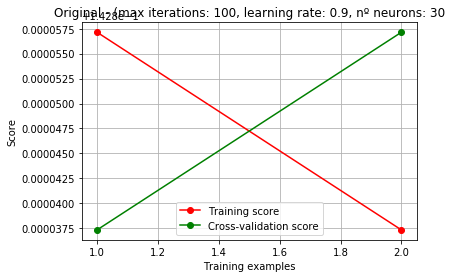

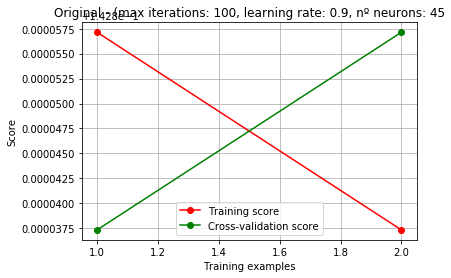

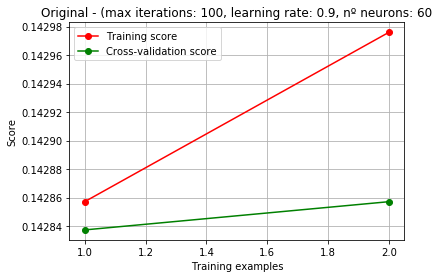

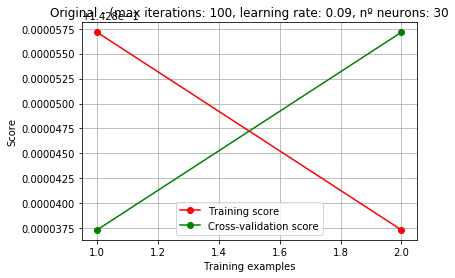

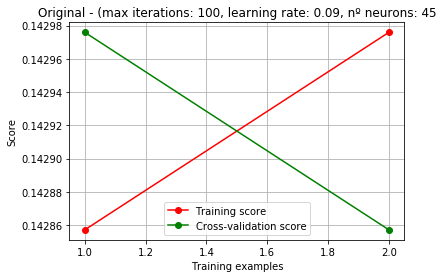

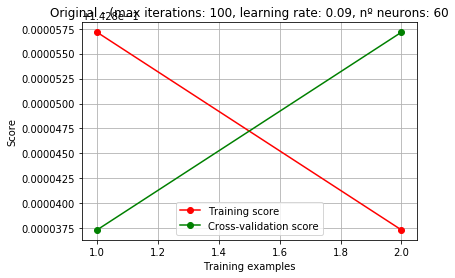

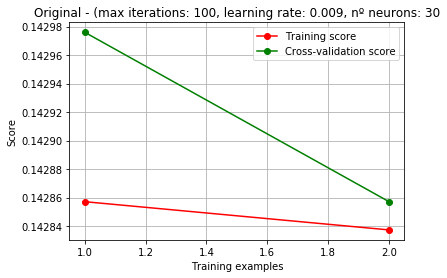

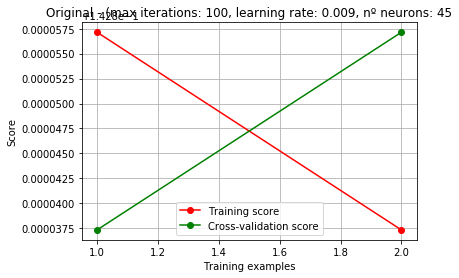

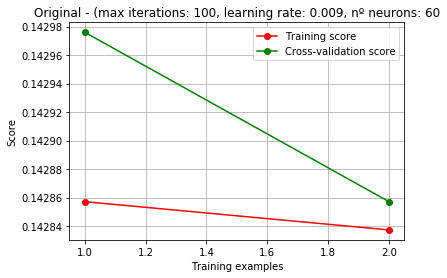

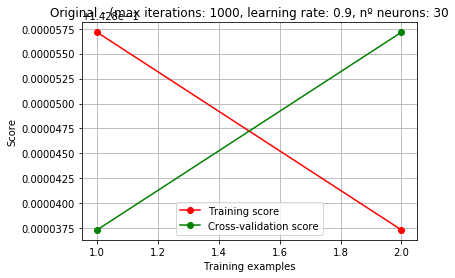

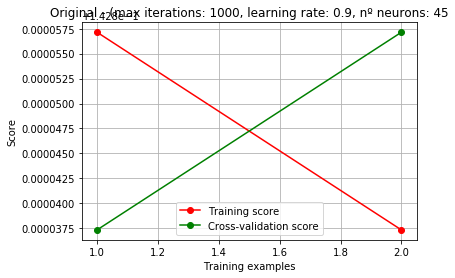

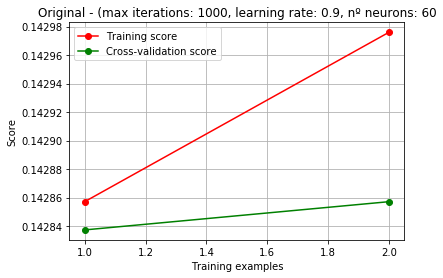

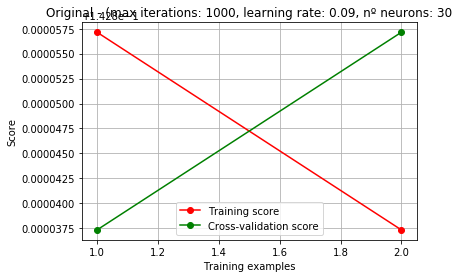

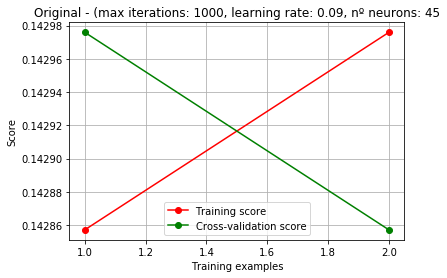

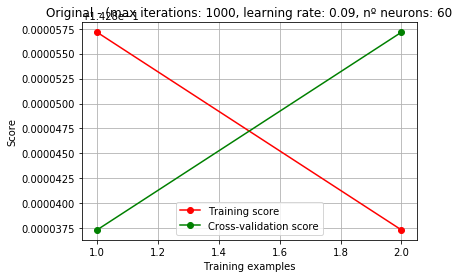

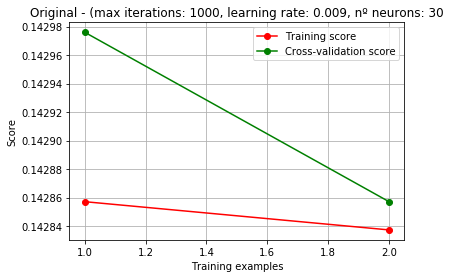

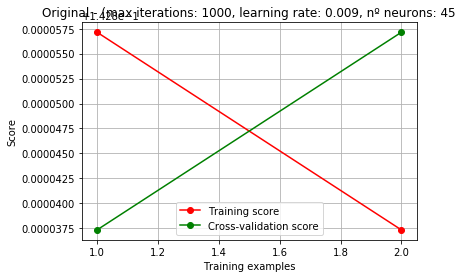

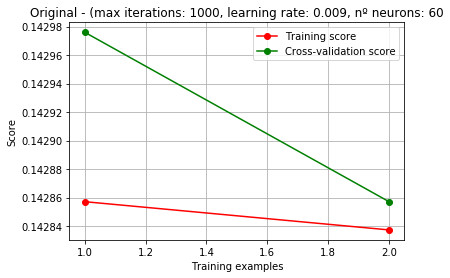

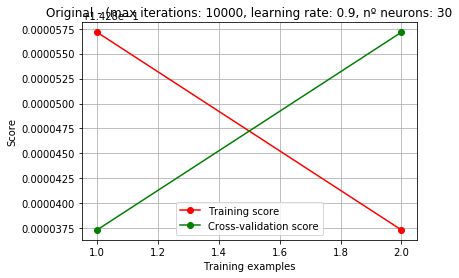

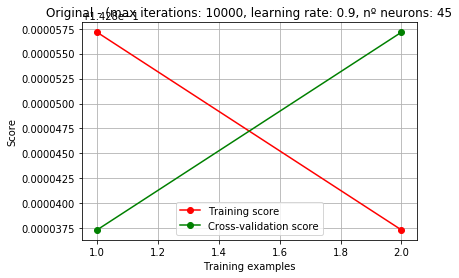

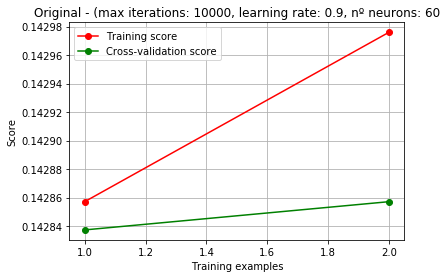

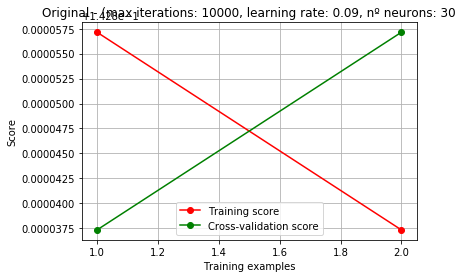

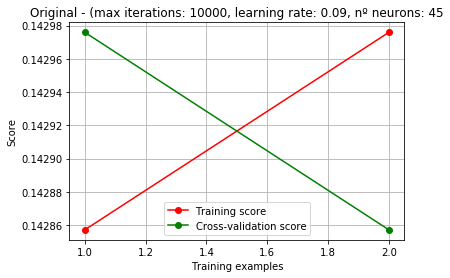

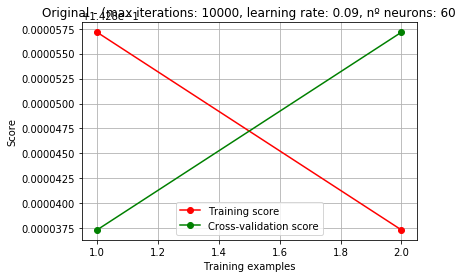

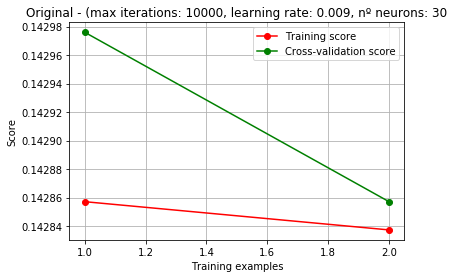

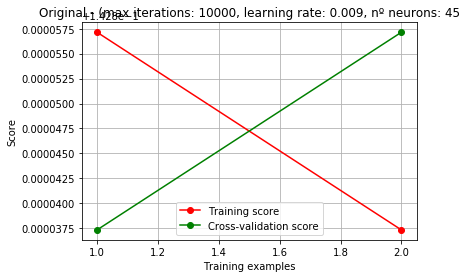

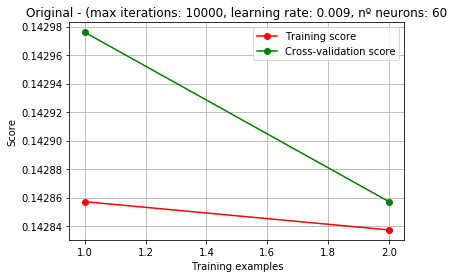

[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 45


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 60


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


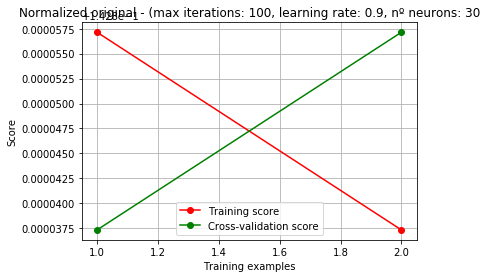

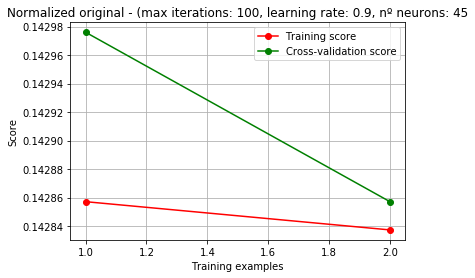

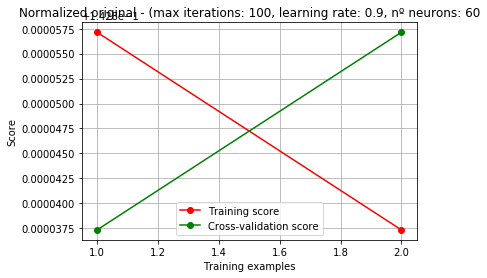

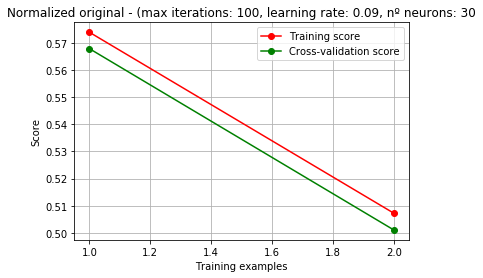

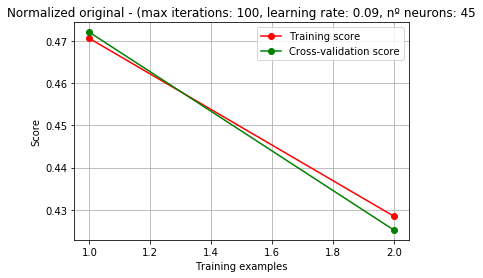

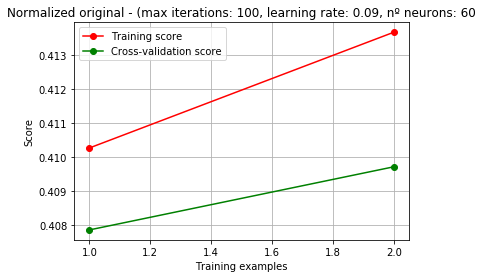

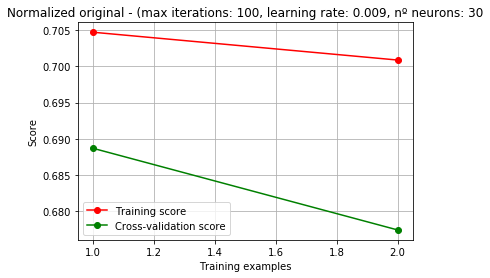

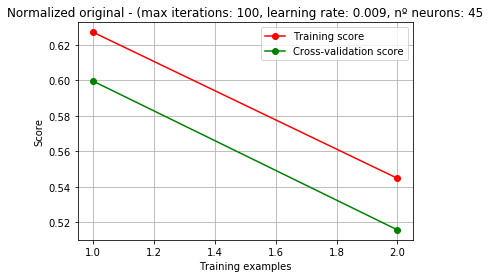

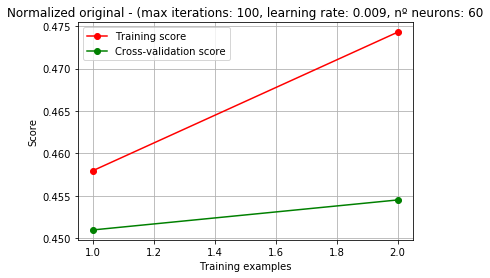

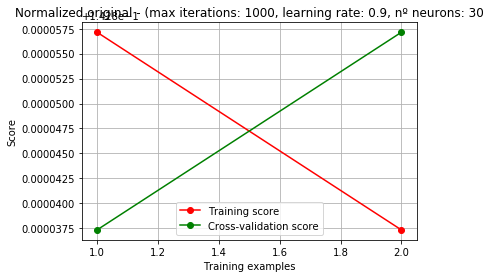

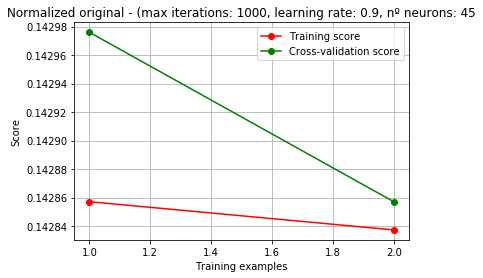

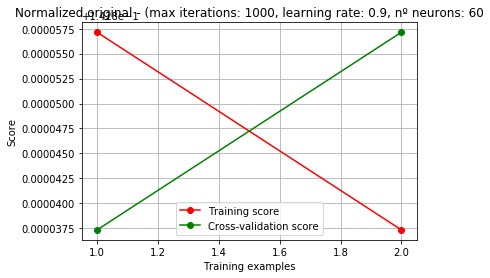

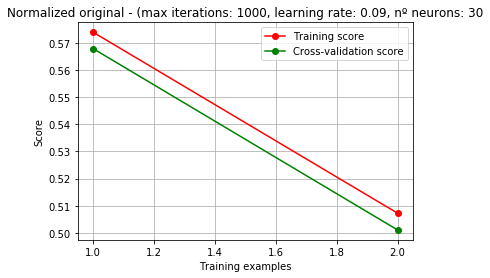

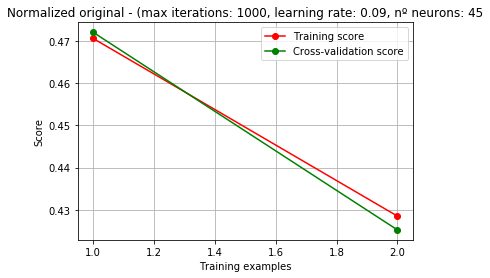

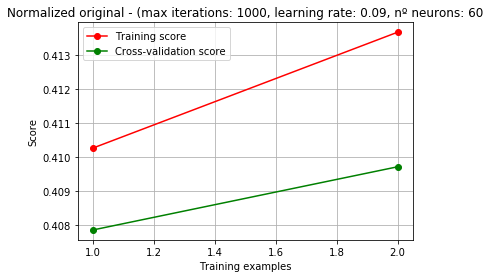

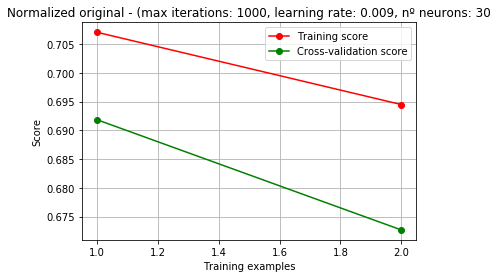

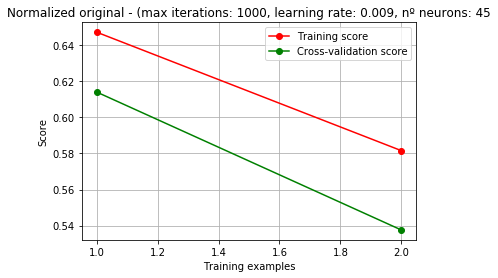

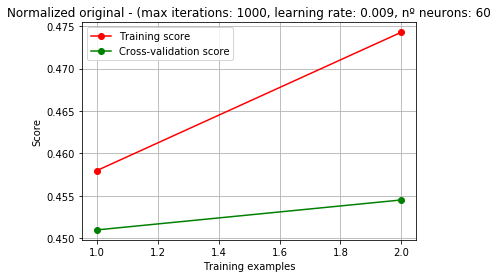

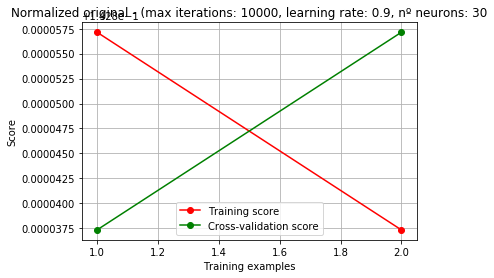

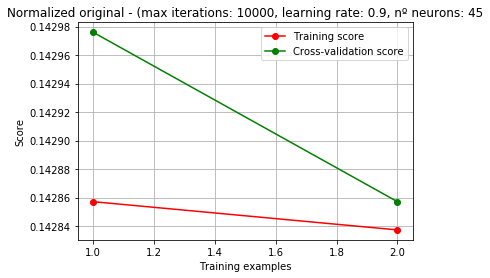

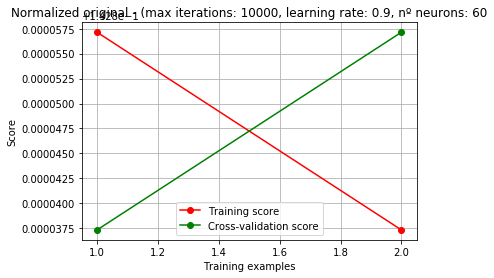

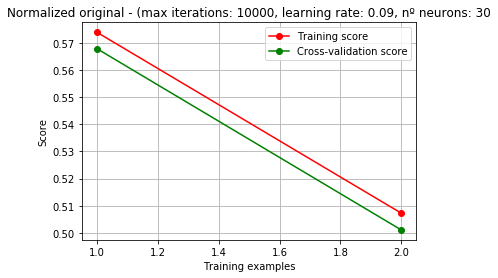

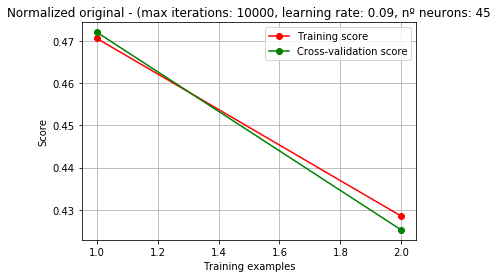

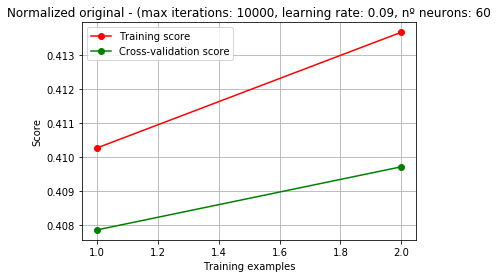

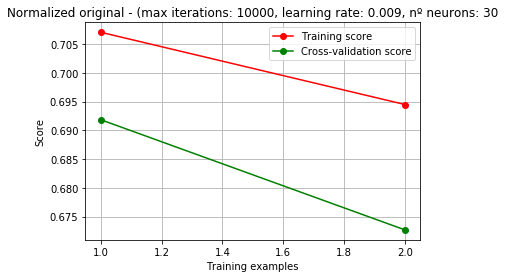

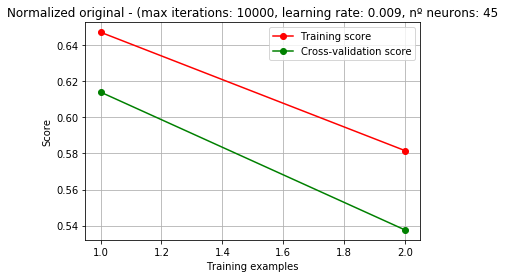

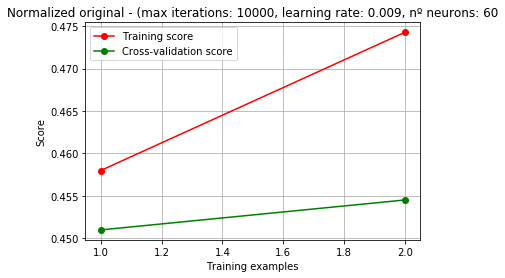

[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.9 ,n_neurons= 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.09 ,n_neurons= 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.9 ,n_neurons= 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.09 ,n_neurons= 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.9 ,n_neurons= 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.09 ,n_neurons= 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 6


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 10000 ,learning_rate= 0.009 ,n_neurons= 12


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


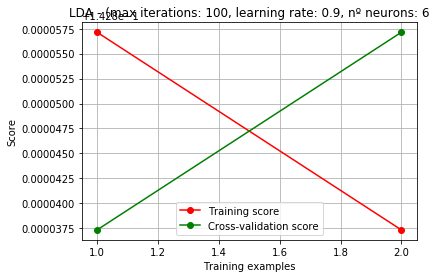

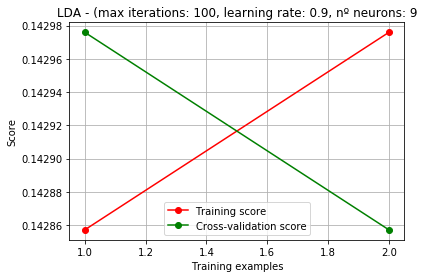

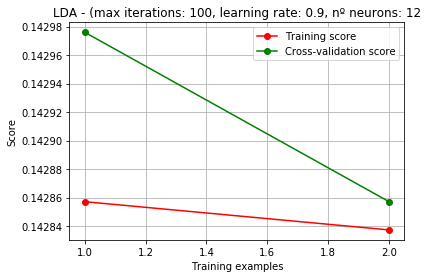

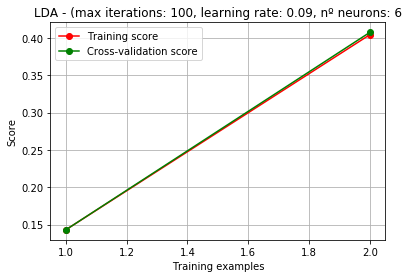

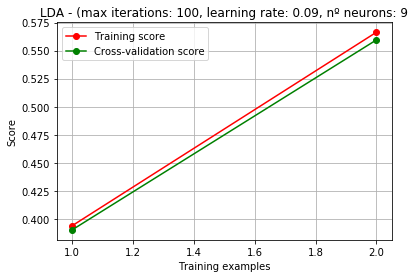

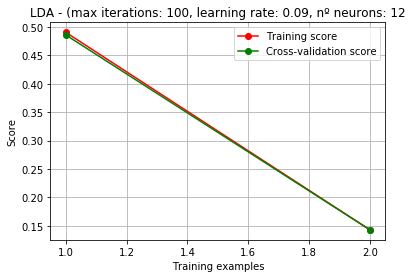

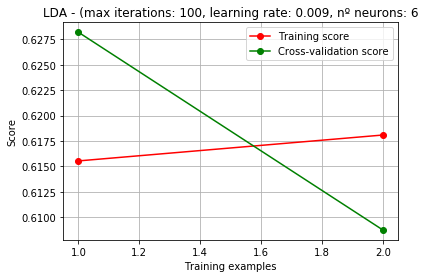

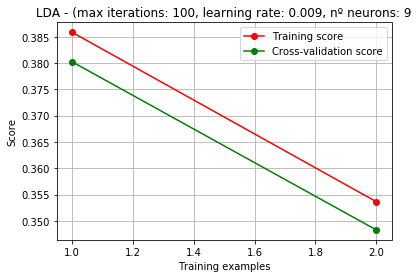

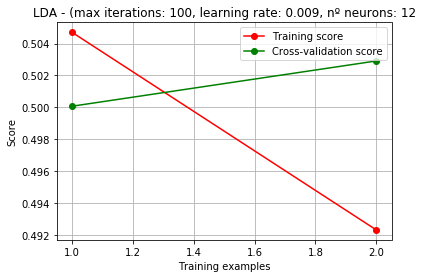

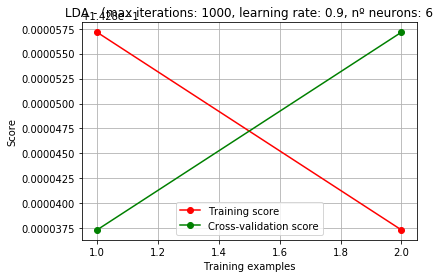

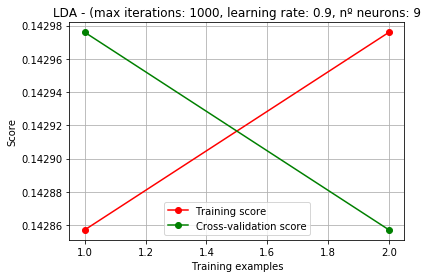

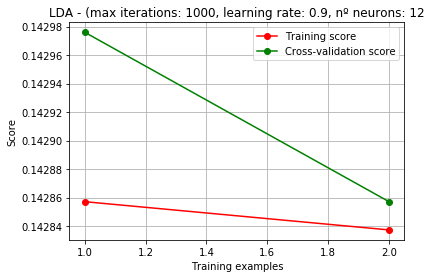

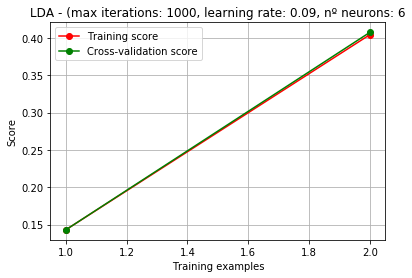

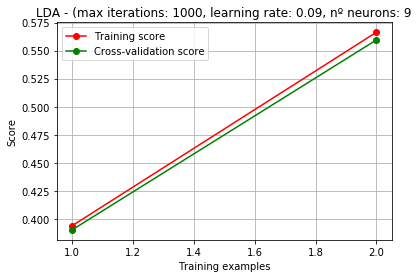

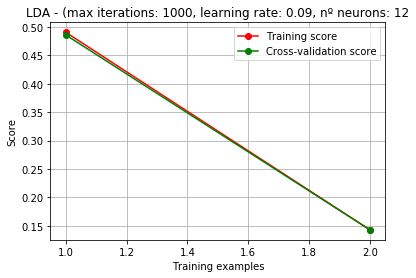

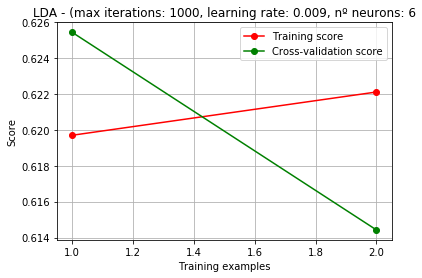

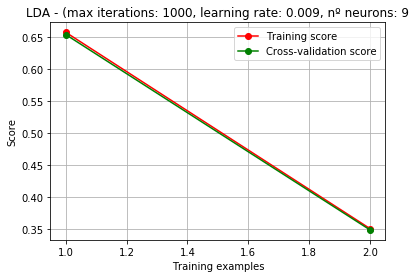

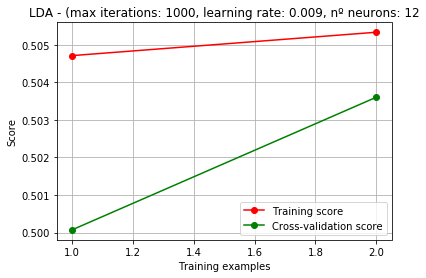

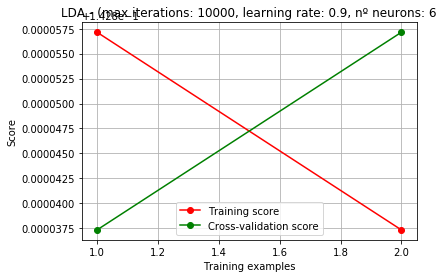

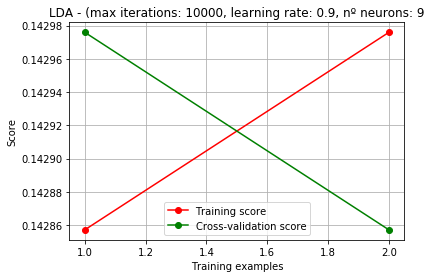

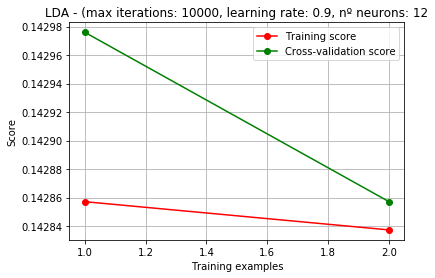

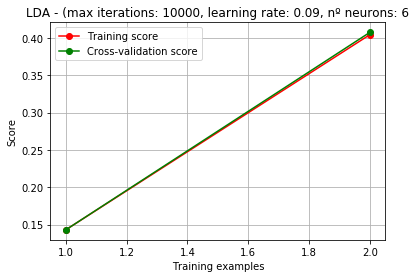

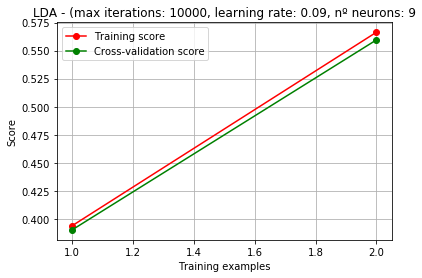

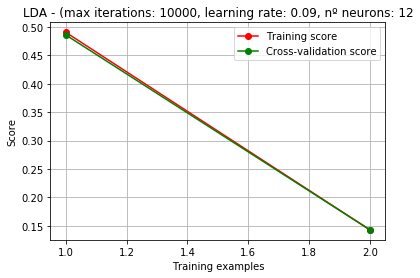

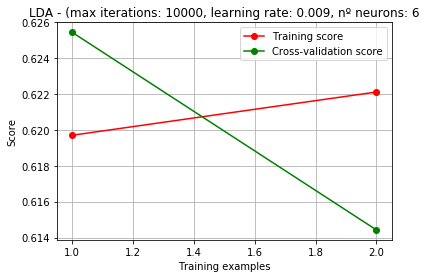

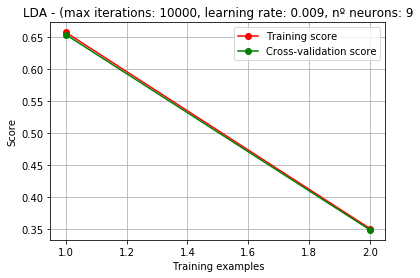

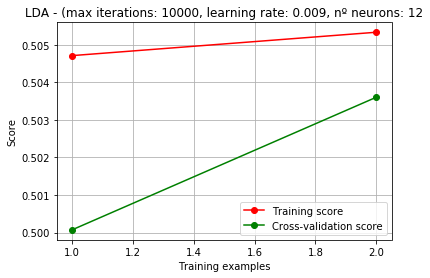

In [22]:
result_original = perform_mlp(original_train, original_test, 'Original')
result_original_norm = perform_mlp(original_norm_train, original_norm_test, 'Normalized original')
result_lda = perform_mlp(lda_train, lda_test, 'LDA')

In [23]:
print("Original: \n", result_original )
print("Original norm: \n", result_original_norm)
print("LDA: \n", result_lda)

Original: 
     accuracy   rate  iteration  neurons
0   0.142887  0.900      100.0     30.0
1   0.142887  0.900      100.0     45.0
2   0.142887  0.900      100.0     60.0
3   0.142887  0.090      100.0     30.0
4   0.142679  0.090      100.0     45.0
5   0.142887  0.090      100.0     60.0
6   0.142887  0.009      100.0     30.0
7   0.142887  0.009      100.0     45.0
8   0.142887  0.009      100.0     60.0
9   0.142887  0.900     1000.0     30.0
10  0.142887  0.900     1000.0     45.0
11  0.142887  0.900     1000.0     60.0
12  0.142887  0.090     1000.0     30.0
13  0.142679  0.090     1000.0     45.0
14  0.142887  0.090     1000.0     60.0
15  0.142887  0.009     1000.0     30.0
16  0.142887  0.009     1000.0     45.0
17  0.142887  0.009     1000.0     60.0
18  0.142887  0.900    10000.0     30.0
19  0.142887  0.900    10000.0     45.0
20  0.142887  0.900    10000.0     60.0
21  0.142887  0.090    10000.0     30.0
22  0.142679  0.090    10000.0     45.0
23  0.142887  0.090    10000

In [24]:
result_original.sort_values(['accuracy', 'rate', 'iteration', 'neurons'], ascending=[False, True, True, True],inplace=True)
result_original_norm.sort_values(['accuracy', 'rate', 'iteration', 'neurons'], ascending=[False, True, True, True],inplace=True)
result_lda.sort_values(['accuracy', 'rate', 'iteration', 'neurons'], ascending=[False, True, True, True],inplace=True)

result_original = result_original.reset_index(drop=True)
result_original_norm = result_original_norm.reset_index(drop=True)
result_lda = result_lda.reset_index(drop=True)

best_original = result_original.iloc[0,:]
best_original_norm = result_original_norm.iloc[0,:]
best_lda = result_lda.iloc[0,:]

In [26]:
print("Original: \n", best_original )
print("Original norm: \n", best_original_norm)
print("LDA: \n", best_lda)

Original: 
 accuracy       0.142887
rate           0.009000
iteration    100.000000
neurons       30.000000
Name: 0, dtype: float64
Original norm: 
 accuracy       0.691972
rate           0.009000
iteration    100.000000
neurons       30.000000
Name: 0, dtype: float64
LDA: 
 accuracy        0.653078
rate            0.009000
iteration    1000.000000
neurons         9.000000
Name: 0, dtype: float64


In [34]:
def perform_mlp_10k(train, test, values, title):
    '''
    Performs mlp for a given dataset.
    '''
    
    train_target = train['cover_type']
    train_data   = train.loc[:, train.columns != 'cover_type']
    test_target  = test['cover_type']
    test_data    = test.loc[:, test.columns != 'cover_type']
    
    momentum = 0.8
    
    train_scores = []
    test_scores = []
    
    r = []
    for i in range(5):
        print('[INFO]...max_iter=', int(values['iteration']), ',learning_rate=', values['rate'], ',n_neurons=', int(values['neurons']))
        mlp = MLPClassifier(momentum=momentum,
                            max_iter=int(values['iteration']),
                            learning_rate_init=values['rate'],
                            hidden_layer_sizes=(int(values['neurons']),1))
        result = cross_validate(mlp, train_data, train_target, cv=10, return_estimator=True)
        acc_best = 0
        best_estimator = result['estimator'][0]
        
        train_scores.append(result['train_score'])
        test_scores.append(result['test_score'])
        
        for estimator in result['estimator']:
            score = estimator.score(test_data, test_target)
            if score > acc_best:
                acc_best = score
                best_estimator = estimator
                
        r.append(acc_best)
    
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(title + ' - (max iterations: ' + str(int(values['iteration'])) + ', learning rate: ' + str(values['rate']) + ', nº neurons: ' + str(int(values['neurons'])))
    plt.xlabel("Split")
    plt.ylabel("Score")
    plt.grid()
    plt.fill_between(range(1,6), train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(range(1,6), test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(range(1,6), train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(range(1,6), test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    plt.legend(loc="best")
    plt.show()
    
    return r

[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


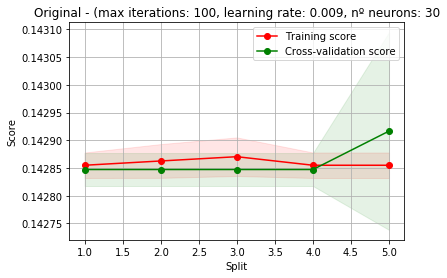

[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochasti

[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochasti

[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochasti

[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochasti

[INFO]...max_iter= 100 ,learning_rate= 0.009 ,n_neurons= 30


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochasti

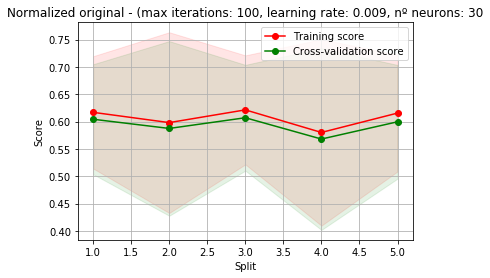

[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


[INFO]...max_iter= 1000 ,learning_rate= 0.009 ,n_neurons= 9


/home/vinihcampos/miniconda3/envs/covertype/lib/python3.6/site-packages/sklearn/utils/deprecation.py:125: FutureWarning: You are accessing a training score ('train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)


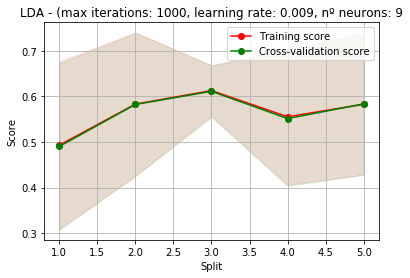

In [35]:
result_original_10k = perform_mlp_10k(original_train, original_test , best_original, 'Original')
result_original_norm_10k = perform_mlp_10k(original_norm_train, original_norm_test , best_original_norm, 'Normalized original')
result_lda_10k = perform_mlp_10k(lda_train, lda_test, best_lda, 'LDA')

In [36]:
print("Original: ", result_original_10k )
print("Original norm: ", result_original_norm_10k)
print("LDA: ", result_lda_10k)

Original:  [0.14288685524126457, 0.14288685524126457, 0.14288685524126457, 0.14288685524126457, 0.14288685524126457]
Original norm:  [0.7298252911813644, 0.7287853577371048, 0.735648918469218, 0.7173460898502496, 0.7298252911813644]
LDA:  [0.6397670549084858, 0.6636855241264559, 0.6574459234608985, 0.6509983361064892, 0.658485856905158]
